In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("diamonds .csv")

In [2]:
df.shape

(53940, 10)

In [3]:
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.duplicated().sum()

146

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(53775, 10)

In [10]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


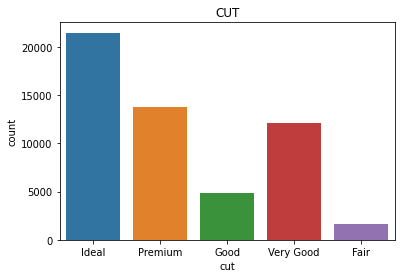

In [12]:
sns.countplot(x=df['cut'])
plt.title("CUT")
plt.show()

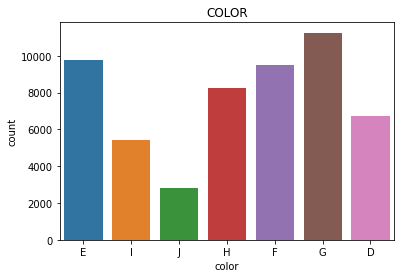

In [13]:
sns.countplot(x=df['color'])
plt.title("COLOR")
plt.show()

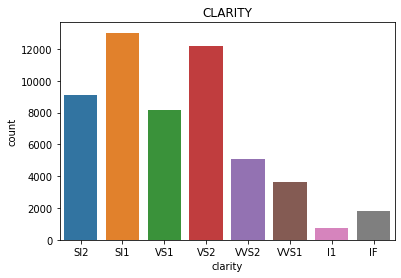

In [14]:
sns.countplot(x=df['clarity'])
plt.title("CLARITY")
plt.show()

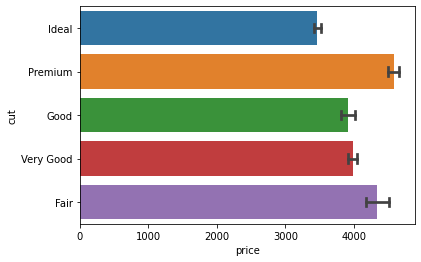

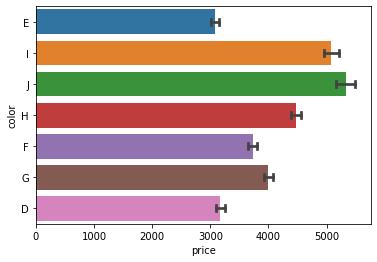

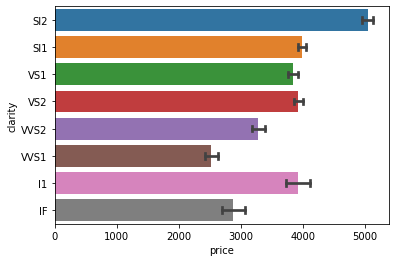

In [15]:
cols = ["cut", "color", "clarity"]

for col in cols:
    sns.barplot(data=df, y=col, x="price", capsize=0.2)
    plt.show()

In [16]:
df_cut_price=round(df.groupby(['cut'])['price'].mean().sort_values(ascending=False))
df_cut_price

cut
Premium      4579.0
Fair         4341.0
Very Good    3981.0
Good         3916.0
Ideal        3462.0
Name: price, dtype: float64

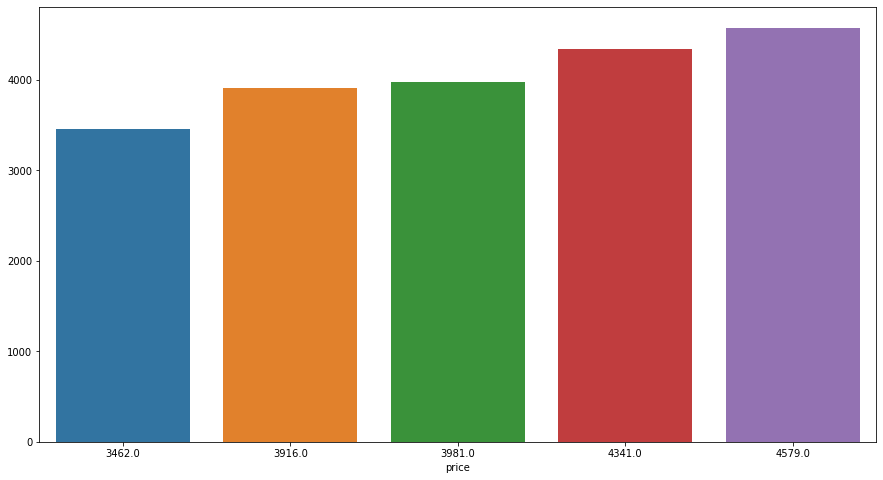

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_cut_price.index,y=df_cut_price.values,data=df_cut_price)
plt.show()

In [18]:
df_cut_color=df.groupby(['cut','color'])['price'].mean().reset_index()
df_cut_color.head(10)

,cut,color,price
0,Fair,D,4291.061350
1,Fair,E,3689.743243
2,Fair,F,3834.750809
3,Fair,G,4220.073955
4,Fair,H,5091.307692
5,Fair,I,4607.534483
6,Fair,J,4975.655462
7,Good,D,3408.107576
8,Good,E,3425.748657
9,Good,F,3498.761852


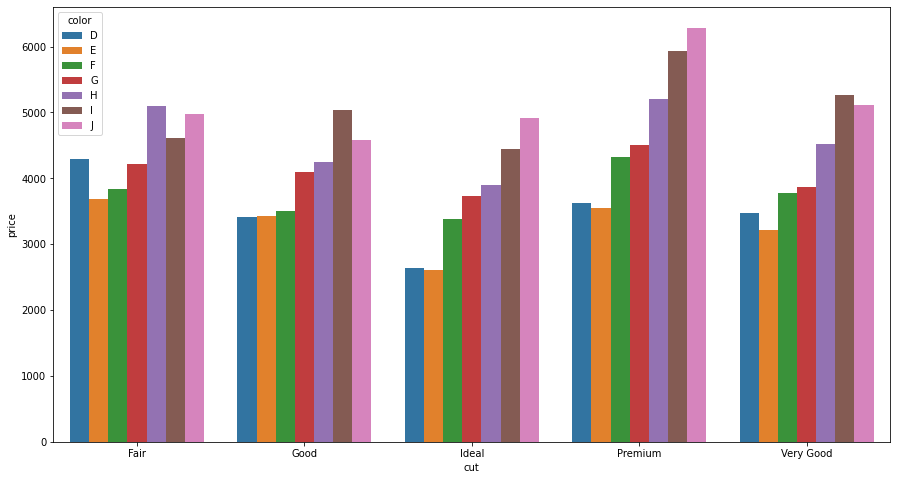

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='cut',y='price',hue='color',data=df_cut_color)
plt.show()

Text(0, 0.5, 'Price')

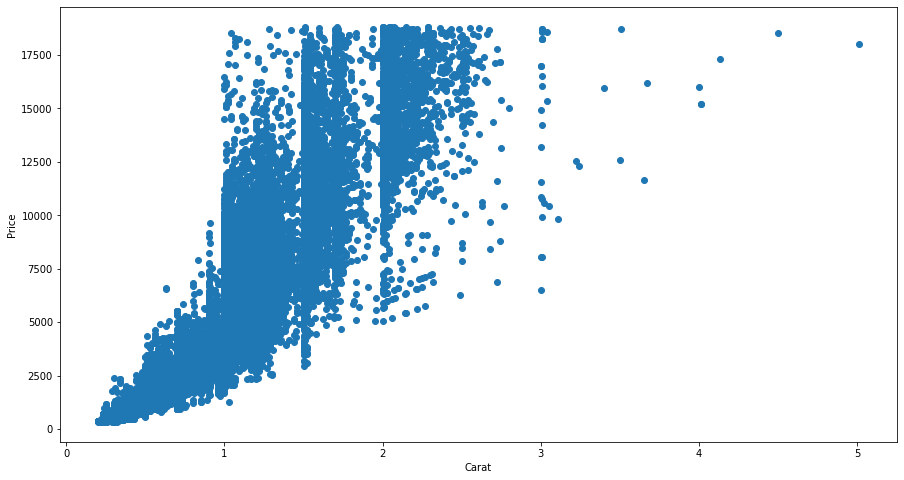

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(x='carat',y='price',data=df,)
plt.xlabel('Carat')
plt.ylabel('Price')

In [21]:
#detecting outliers
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
IQR

951.0 5324.0


4373.0

In [22]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5608.5, 11883.5)

In [23]:
#removing outliers
diamonds_data_no_outlier = df[(df.price>lower_limit)&(df.price<upper_limit)]  
diamonds_data_no_outlier.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

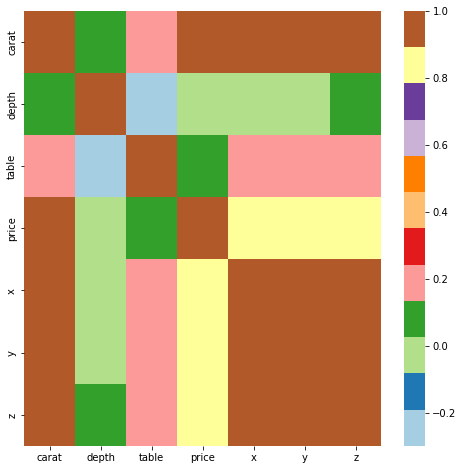

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Paired')

In [25]:
cor=df.corr()
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

carat    0.921548
price    1.000000
x        0.887137
y        0.867685
z        0.868030
Name: price, dtype: float64

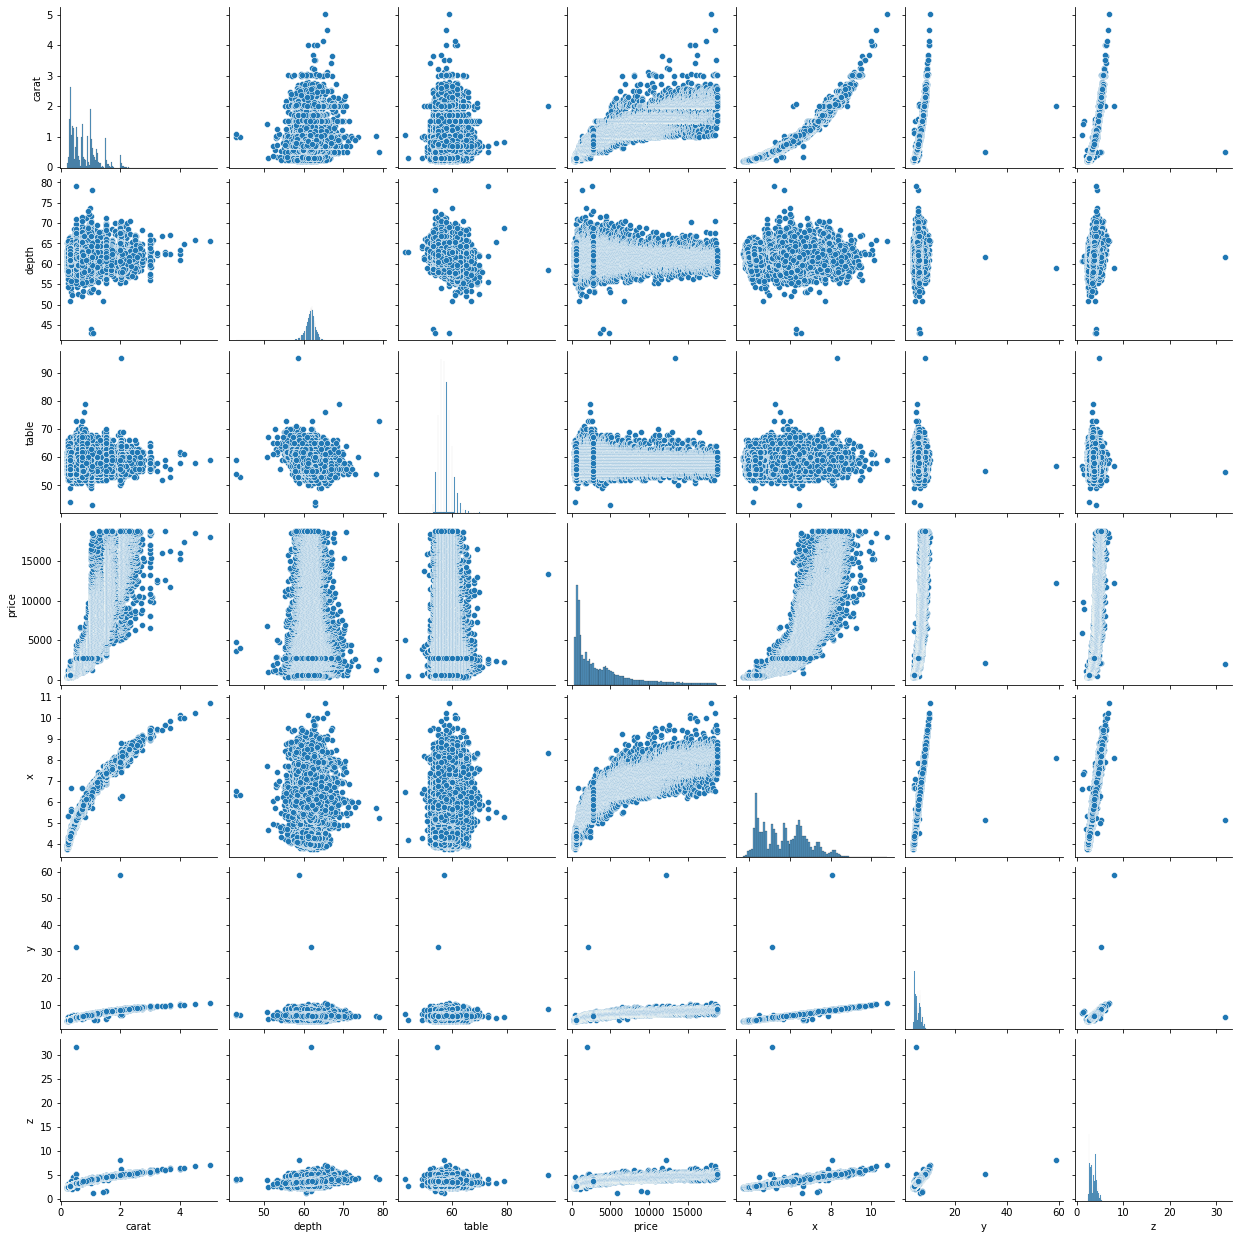

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
X=df[['carat','cut','color','clarity','x','y','z']]
y=df['price']

In [28]:
print(X.head())
print(y.head())

   carat      cut color clarity     x     y     z
0   0.23    Ideal     E     SI2  3.95  3.98  2.43
1   0.21  Premium     E     SI1  3.89  3.84  2.31
2   0.23     Good     E     VS1  4.05  4.07  2.31
3   0.29  Premium     I     VS2  4.20  4.23  2.63
4   0.31     Good     J     SI2  4.34  4.35  2.75
0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [30]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.cut=le.fit_transform(X.cut)
X.color=le.fit_transform(X.color)
X.clarity=le.fit_transform(X.clarity)
print(X.head(10))'''
cut_class_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5, }
clarity_dict   = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS1': 5, 'VS2': 4, 'VVS2': 6, 'VVS1': 7, 'IF': 8 }
color_dict     = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6,'D': 7,} 

x_train['cut'] = x_train['cut'].map(cut_class_dict)
x_train['clarity'] = x_train['clarity'].map(clarity_dict)
x_train['color'] = x_train['color'].map(color_dict)
print("x_Train:",x_train.head())

x_test['cut'] = x_test['cut'].map(cut_class_dict)
x_test['clarity'] = x_test['clarity'].map(clarity_dict)
x_test['color'] = x_test['color'].map(color_dict)
print("X_test:",x_test.head())

x_Train:        carat  cut  color  clarity     x     y     z
49460   0.60    5      6        4  5.40  5.43  3.36
597     0.70    4      5        4  5.72  5.64  3.54
42169   0.43    3      4        8  4.80  4.84  3.02
27707   0.36    2      6        2  4.55  4.52  2.89
33363   0.41    5      4        4  4.78  4.81  2.99
X_test:        carat  cut  color  clarity     x     y     z
48571   0.71    3      1        5  5.61  5.65  3.61
31078   0.33    5      4        6  4.45  4.49  2.75
47233   0.71    3      2        4  5.65  5.61  3.57
49500   0.55    5      5        5  5.28  5.30  3.27
28478   0.32    3      6        3  4.41  4.37  2.77


In [31]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred = linear_reg.predict(x_test)


In [32]:
print("Score on training data : ",linear_reg.score(x_train,y_train))
print("Score on testing data : ",linear_reg.score(x_test,y_test))


Score on training data :  0.9054868271257028
Score on testing data :  0.9097108645872423


In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1476736.5701883212

In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

,Actual,Predicted
48571,1993,2282.798755
31078,752,1047.514797
47233,1840,2062.864528
49500,2119,2501.699521
28478,672,-257.207359


In [35]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  805.3378283299708
Mean Squared Error:  1476736.5701883212
Root Mean Squared Error:  1215.210504475797


In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)
print("Score on training data : ",knn_regressor.score(x_train,y_train))
print("Score on testing data : ",knn_regressor.score(x_test,y_test))


Score on training data :  0.98360122194683
Score on testing data :  0.9771444328604967


In [37]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

Mean Absolute Error:  312.0583606069622
Mean Squared Error:  373817.4219190717
Root Mean Squared Error:  611.4061022913263


,Actual,Predicted
48571,1993,2018.2
31078,752,752.8
47233,1840,2098.6
49500,2119,1885.4
28478,672,705.4


In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred = dt_regressor.predict(x_test)
print("Score on training data : ",dt_regressor.score(x_train,y_train))
print("Score on testing data : ",dt_regressor.score(x_test,y_test))


Score on training data :  0.9999882736621083
Score on testing data :  0.9655911107744848


In [39]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

Mean Absolute Error:  370.8911410294555
Mean Squared Error:  562779.3956225825
Root Mean Squared Error:  750.1862406246748


,Actual,Predicted
48571,1993,1881.0
31078,752,730.0
47233,1840,2362.0
49500,2119,1975.0
28478,672,684.0


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred = dt_regressor.predict(x_test)
print("Score on training data : ",rf_regressor.score(x_train,y_train))
print("Score on testing data : ",rf_regressor.score(x_test,y_test))


Score on training data :  0.9973113944020776
Score on testing data :  0.9817054184330045


In [41]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

Mean Absolute Error:  370.8911410294555
Mean Squared Error:  562779.3956225825
Root Mean Squared Error:  750.1862406246748


,Actual,Predicted
48571,1993,1881.0
31078,752,730.0
47233,1840,2362.0
49500,2119,1975.0
28478,672,684.0


In [42]:
#selecting best value
sq_err = []

for i in range(1,31):
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(x_train, y_train)
    
    y_pred_train = knn_reg.predict(x_train)
    y_pred_test  = knn_reg.predict(x_test)
    
    sq_err.append(metrics.mean_squared_error(y_test, y_pred_test))
    

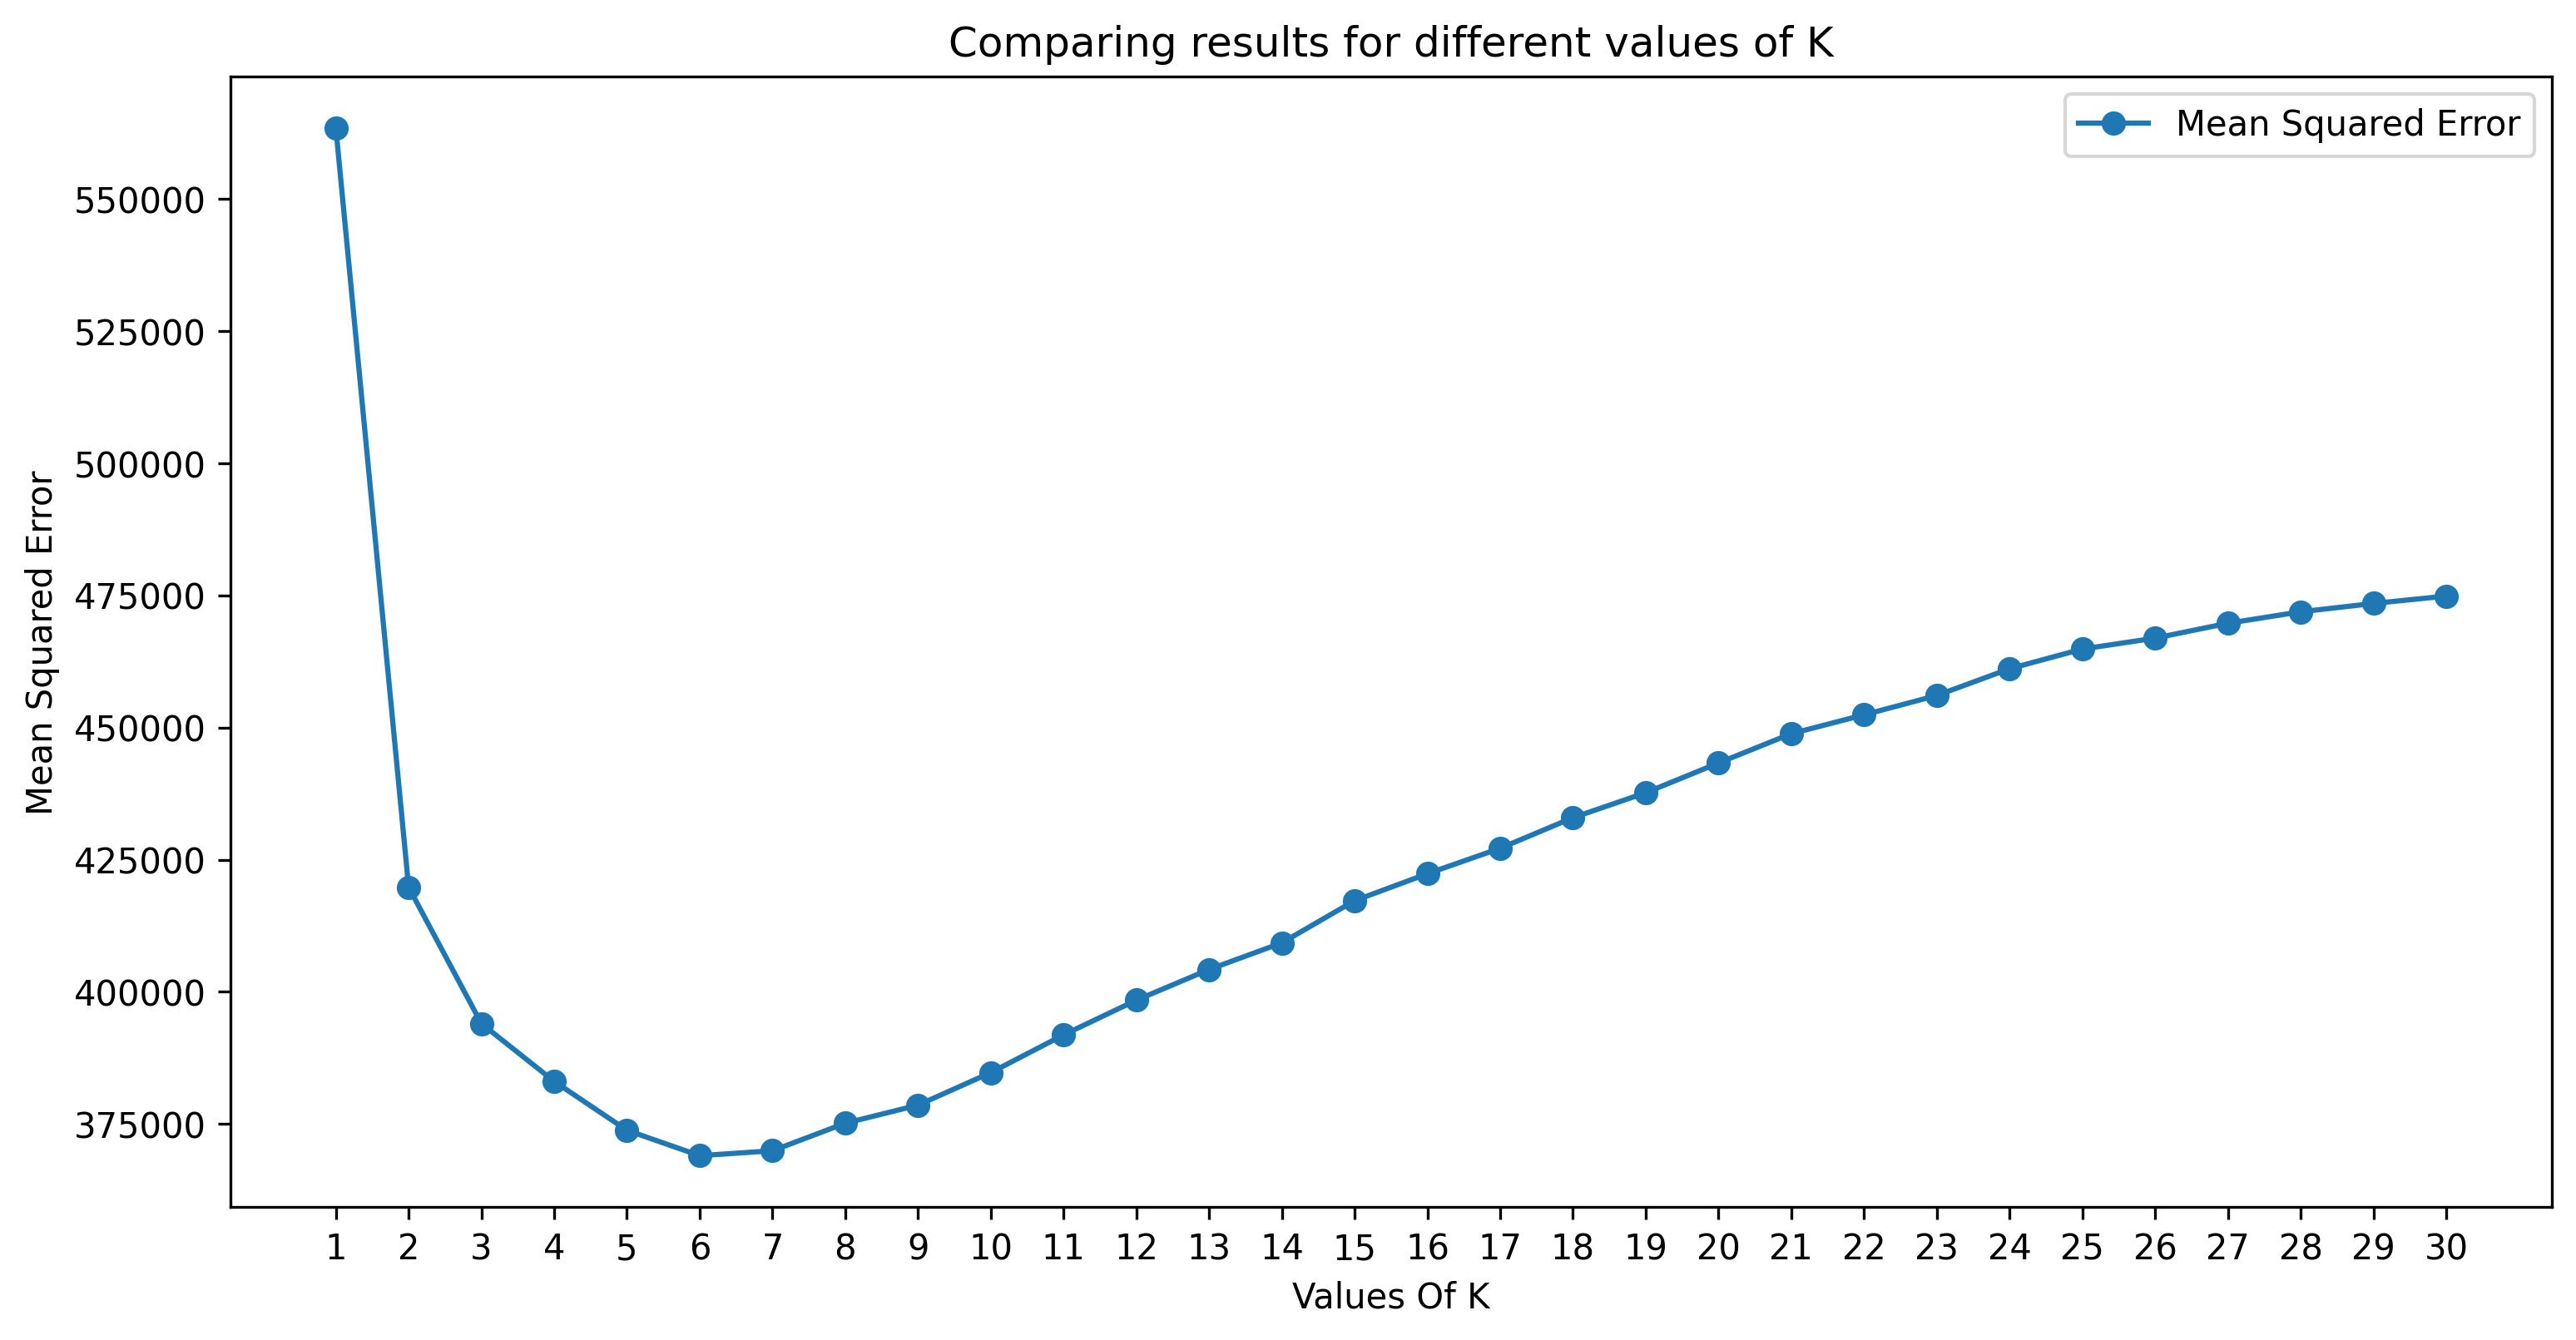

In [43]:
x = list(range(1,31))

plt.figure(figsize = (12,6), dpi = 300)
plt.plot(x, sq_err, '-o', label = 'Mean Squared Error')

plt.xticks(x)
plt.xlabel('Values Of K')
plt.ylabel('Mean Squared Error')
plt.title('Comparing results for different values of K')
plt.legend()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)
print("Score on training data : ",knn_regressor.score(x_train,y_train))
print("Score on testing data : ",knn_regressor.score(x_test,y_test))


Score on training data :  0.9822517544630165
Score on testing data :  0.9774381193021119


In [45]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

Mean Absolute Error:  311.22794555191905
Mean Squared Error:  369013.9922869351
Root Mean Squared Error:  607.465218993594


,Actual,Predicted
48571,1993,2026.166667
31078,752,749.833333
47233,1840,2127.666667
49500,2119,1901.166667
28478,672,707.833333


In [47]:
print(knn_regressor.predict([[0.71,3,1,5,5.61,5.65,3.61]]))

[2026.16666667]


c:\Users\Varshith\anaconda3\envs\DS\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
